In [1]:
import numpy as np

from utils import get_data, plot_prices

In [2]:
def la(data, p, second_order=True, eps=1e-5):
    Xi = 3 * (p + 1)
    X = data[np.arange(p) + np.arange(len(data) - p)[:, None]]
    omega = np.argpartition(np.sum(np.power(X - data[-p:], 2), axis=1), Xi)[:Xi]
    if not second_order:
        Y = np.hstack((np.ones(Xi)[:, None], X[omega]))
    else:
        idx = np.arange(p)[:, None] - np.arange(p) <= 0
        Y = np.hstack((np.ones(Xi)[:, None], (X[omega, :, None] * X[omega, None, :])[:, idx]))
    params = np.linalg.solve(Y.T @ Y + eps * np.eye(Y.shape[1]), Y.T @ data[omega + p])
    if not second_order:
        return params, np.sum(params * np.hstack([1, data[-p:]]))
    else:
        return params, np.sum(params * np.hstack([1, (data[-p:, None] * data[-p:])[idx]]))

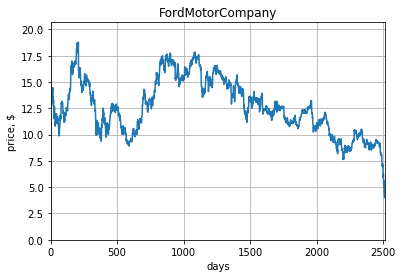

In [3]:
name = 'FordMotorCompany'
data = get_data(name, column='Last')
plot_prices(data, name)

In [4]:
print(data[-1])
data = data[:-1]

5.03


In [5]:
p = 100
print(la(data, p, second_order=False)[1])
%timeit -n 3 la(data, p, second_order=False)[1]

5.04044792728646
50.9 ms ± 10.2 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [6]:
p = 100
print(la(data, p, second_order=True)[1])
%timeit -n 3 la(data, p, second_order=True)[1]

4.764465116274884
3.45 s ± 860 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)
